In [51]:
#a: Import pandas so we can import our large cleaned data set, then we need to import the cleaned churn file provided to us in the data dictionary
#Jupyter Lab 3.44, Python 3
import pandas as pd
churn_df = pd.read_csv(r'C:\Users\seans\Documents\WGU\D212\churn_clean.csv')

#Baisc math imports
import numpy as np
from pandas import DataFrame

#For univariatre visualizations
import matplotlib.pyplot as mpl
%matplotlib inline

# The following line of code was put into the anaconda prompt from windows to install the kneed module and yellowbrick modeule onto my machine. Please do the same if you have issues importing kneed.
#"conda install -c conda-forge kneed" and after, "pip install yellowbrick". Only paste what is inside the quotes, then press enter.

#For the k-means scaling, clustering
from kneed import KneeLocator
from sklearn import preprocessing
from sklearn import datasets
from sklearn import cluster
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [52]:
#b: This step views the data types and information in churn_clean
print("Floats")
print(churn_df.select_dtypes(include="float").info())

print("Integers")
print(churn_df.select_dtypes(include="integer").info())

print("Objects")
print(churn_df.select_dtypes(include="object").info())

print("Dataset Information")
print(churn_df.info)

Floats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Income              10000 non-null  float64
 3   Outage_sec_perweek  10000 non-null  float64
 4   Tenure              10000 non-null  float64
 5   MonthlyCharge       10000 non-null  float64
 6   Bandwidth_GB_Year   10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB
None
Integers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   CaseOrder             10000 non-null  int64
 1   Zip                   10000 non-null  int64
 2   Population            10000 non-null  int64
 3   Children              10000 non

In [53]:
#c: Check for any missing values
churn_df.isna().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [54]:
#d: Drop categorical or non-continuous variables from dataframe
churn_df = churn_df.drop(columns=['Gender' ,
                                  'Marital',
                                  'Area',
                                  'Contract',
                                  'PaymentMethod',
                                  'Churn' , 
                                  'Techie' , 
                                  'Contract' ,       
                                  'Port_modem' , 
                                  'Tablet' ,
                                  'InternetService' , 
                                  'Phone' , 
                                  'Multiple' ,
                                  'OnlineSecurity' ,
                                  'OnlineBackup', 
                                  'DeviceProtection' ,
                                  'TechSupport' ,
                                  'StreamingTV', 
                                  'StreamingMovies',
                                  'PaperlessBilling',
                                  'Item1',
                                  'Item2',
                                  'Item3',
                                  'Item4',
                                  'Item5',
                                  'Item6',
                                  'Item7',
                                  'Item8'])

In [55]:
#d: Remove Demographic information
churn_df = churn_df.drop(columns=['CaseOrder' ,
                               'Customer_id' ,
                               'Interaction' ,
                               'UID' ,
                               'City' ,
                               'State' ,
                               'County' ,
                               'Zip' ,
                               'Lat' ,
                               'Lng' ,
                               'Population' ,
                               'TimeZone' ,
                               'Job'
                               ])

In [56]:
#e: Summary statistics
print (churn_df.mean())
#Median Values in the Distribution)
print (churn_df.median())

Children                    2.087700
Age                        53.078400
Income                  39806.926771
Outage_sec_perweek         10.001848
Email                      12.016000
Contacts                    0.994200
Yearly_equip_failure        0.398000
Tenure                     34.526188
MonthlyCharge             172.624816
Bandwidth_GB_Year        3392.341550
dtype: float64
Children                    1.000000
Age                        53.000000
Income                  33170.605000
Outage_sec_perweek         10.018560
Email                      12.000000
Contacts                    1.000000
Yearly_equip_failure        0.000000
Tenure                     35.430507
MonthlyCharge             167.484700
Bandwidth_GB_Year        3279.536903
dtype: float64


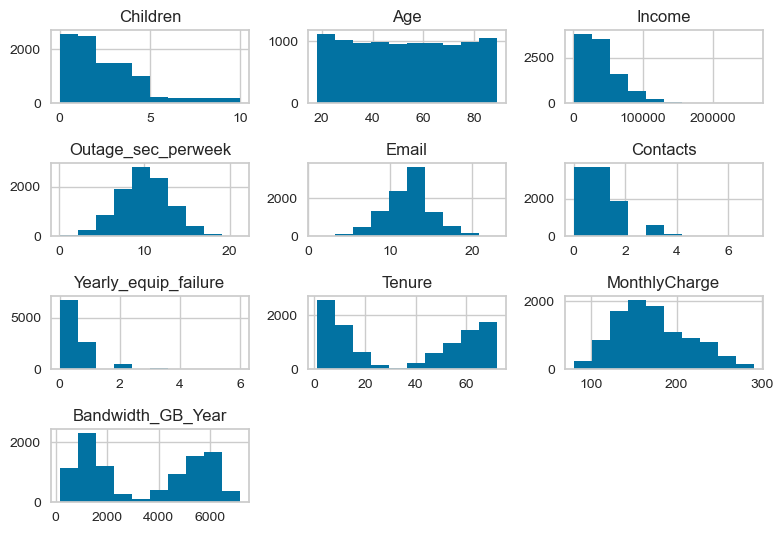

In [57]:
#f: perform univariate analysis with histograms
churn_df[['Children', 
          'Age' , 
          'Income' , 
          'Outage_sec_perweek' , 
          'Email' , 
          'Contacts' , 
          'Yearly_equip_failure' , 
          'Tenure' , 'MonthlyCharge' , 'Bandwidth_GB_Year']].hist()
mpl.savefig('churn_hists.jpg')
mpl.tight_layout()

In [58]:
#g: Use the standardscaler package to standardize our values
num_col = churn_df.columns[churn_df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler = StandardScaler()
churn_df[num_col] = scaler.fit_transform(churn_df[num_col])
#Check for scaling
print(churn_df)

      Children       Age    Income  Outage_sec_perweek     Email  Contacts  \
0    -0.972338  0.720925 -0.398778           -0.679978 -0.666282 -1.005852   
1    -0.506592 -1.259957 -0.641954            0.570331 -0.005288 -1.005852   
2     0.890646 -0.148730 -1.070885            0.252347 -0.996779 -1.005852   
3    -0.506592 -0.245359 -0.740525            1.650506  0.986203  1.017588   
4    -0.972338  1.445638  0.009478           -0.623156  1.316700  1.017588   
...        ...       ...       ...                 ...       ...       ...   
9995  0.424900 -1.453214  0.564456           -0.196888 -0.005288  1.017588   
9996  0.890646 -0.245359 -0.201344           -1.095915  0.986203  1.017588   
9997 -0.506592 -0.245359  0.219037           -1.146198 -0.666282 -1.005852   
9998 -0.506592 -0.680187 -0.820588            0.695616  0.655706  0.005868   
9999 -0.506592 -1.211643 -1.091760            0.589028  1.647197  0.005868   

      Yearly_equip_failure    Tenure  MonthlyCharge  Bandwidth_

In [59]:
#h: List features for analysis
Features = (list(churn_df))
print('Features for analysis include: \n', Features)

Features for analysis include: 
 ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']


In [60]:
#i: Extract Clean dataset
churn_df.to_csv('D212_churn_Task1.csv')

In [61]:
# Running K means with 20 clusters and showing the intertia's for all variables
no_of_clusters = range(1,21)
inertia = []

for n in no_of_clusters:
    kmeans = KMeans(n_clusters=n, random_state=540)
    kmeans = kmeans.fit(churn_df)
    i = kmeans.inertia_
    inertia.append(i)
    print("The innertia for :", n, "Clusters is:", i)

The innertia for : 1 Clusters is: 99999.99999999997
The innertia for : 2 Clusters is: 81703.413078988
The innertia for : 3 Clusters is: 77425.4402132015
The innertia for : 4 Clusters is: 73959.82018226922
The innertia for : 5 Clusters is: 70833.22073670026
The innertia for : 6 Clusters is: 67487.58432099453
The innertia for : 7 Clusters is: 64931.872782177554
The innertia for : 8 Clusters is: 62231.800062614515
The innertia for : 9 Clusters is: 60215.56940972775
The innertia for : 10 Clusters is: 58529.625701689525
The innertia for : 11 Clusters is: 56886.41855635871
The innertia for : 12 Clusters is: 55621.522667391066
The innertia for : 13 Clusters is: 54450.59410218634
The innertia for : 14 Clusters is: 53302.211625020325
The innertia for : 15 Clusters is: 52380.42953437563
The innertia for : 16 Clusters is: 51136.34551451661
The innertia for : 17 Clusters is: 50327.10139537831
The innertia for : 18 Clusters is: 49201.84730703118
The innertia for : 19 Clusters is: 48631.67281016224


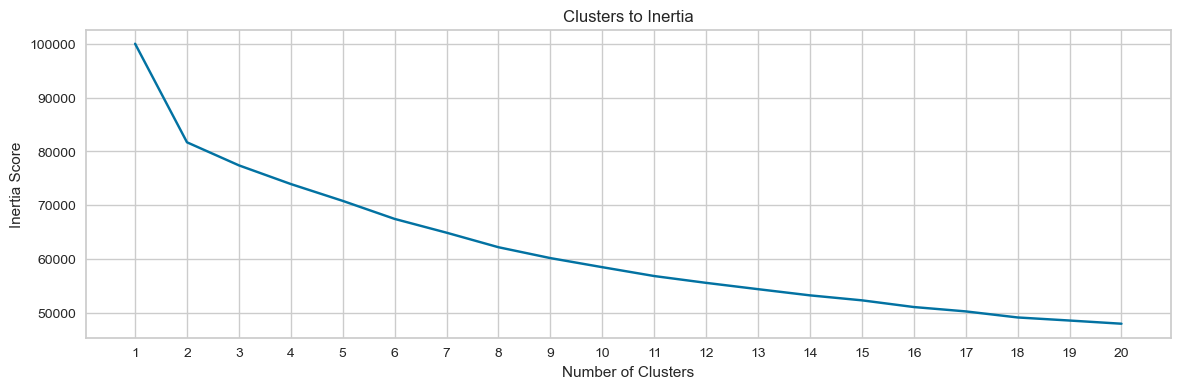

In [62]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = mpl.subplots(1, figsize=(14,4))
num = np.arange(len(no_of_clusters))
ax1.plot(num, inertia)
ax1.set_xticks(num)
ax1.set_xticklabels(no_of_clusters)
mpl.xlabel('Number of Clusters')
mpl.ylabel('Inertia Score')
mpl.title("Clusters to Inertia")
mpl.show()

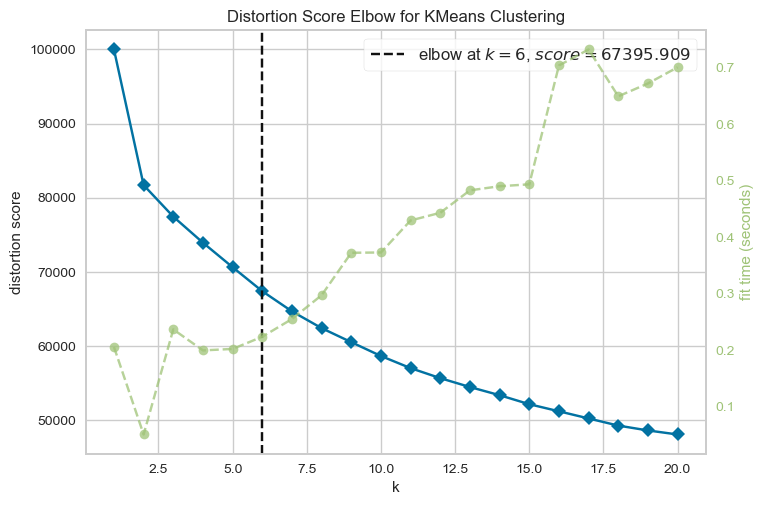

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
model = KMeans()
#k is range of number of clusters. We are using a wide range to find the ideal number of clusters
visualizer = KElbowVisualizer(model, k=(1,21), timings= True,figsize=(20,10))
visualizer.fit(churn_df)
visualizer.show()

In [64]:
#From this, we gather the best number of clusters is 6

In [69]:
kmeans.cluster_centers_

array([[-2.08466589e-01, -1.18609013e-02,  2.34029052e+00,
         5.51583385e-02, -9.53462360e-02,  3.96786573e-02,
        -2.75777410e-02,  9.52810035e-01, -2.16604805e-01,
         9.30836291e-01],
       [-2.12736864e-01,  8.32869178e-01, -3.03654678e-01,
        -4.99292023e-01,  9.67476323e-01, -3.07098908e-01,
        -2.30927061e-01, -9.76479018e-01, -2.65989709e-01,
        -1.02298236e+00],
       [-2.21134695e-01,  5.91679175e-01, -2.15928693e-01,
         1.27326764e+00,  7.88970765e-01, -3.15830908e-01,
        -2.01934942e-01,  9.45340512e-01,  1.15349001e-03,
         9.09412923e-01],
       [ 2.58164297e+00, -1.32842758e-01,  1.90511398e-03,
         5.24318112e-02, -2.39953232e-02, -8.95772781e-02,
        -6.21294318e-02, -9.60191757e-01, -6.35206375e-02,
        -8.74386554e-01],
       [-1.48269170e-01,  8.57319369e-01, -2.71257583e-01,
         4.22409020e-01, -8.49020992e-01, -3.69730957e-01,
        -1.04173956e-01, -9.51010177e-01, -3.72767272e-01,
        -9.